In [11]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sns
from elections_functions import *
from sklearn.decomposition import PCA
# from dim_reduc_internal import show_votes_pca

In [12]:

# Path to datafiles - change to your directory!
DATA_PATH = ''
ELECTIONS = "בחירות 2020 או 2019 ב"

In [13]:
# Helper functions: you can use and modify
# Draw 1*3 plots
def subplot_bars(x, y, title_str):
    width = 0.35
    fig, axs = plt.subplots(3, figsize=(25, 10))
    for i in range(3): # loop on plots
        axs[i].bar(np.arange(9), x[i,:], width, color='b')
        axs[i].bar(np.arange(9)+width, y[i,:], width, color='r')
        axs[i].set_title(title_str[i][::-1], fontsize=24)
        axs[i].set_xticks(np.arange(9))
    plt.show()

In [14]:
def plop():
    df_2020, df_2020_raw = read_election_results('2020', 'city')
    df_2019b, df_2019b_raw = read_election_results('2019b', 'city')
    df_2020_raw = df_2020_raw[df_2020_raw.index != 'מעטפות חיצוניות']
    df_2019b_raw = df_2019b_raw[df_2019b_raw.index != 'מעטפות חיצוניות']
    df_2020_big = df_2020[big_parties_2020]
    df_2019b_big = df_2019b[big_parties_2019b]
    df_2019b_big['אמת'] = df_2019b_big[['מרצ', 'אמת']].sum(axis=1)
    df_2019b_big['נץ'] = df_2019b_big['כף']
    df_2019b_big = df_2019b_big.drop(['מרצ', 'כף'], axis=1)
    df_combined = pd.concat([df_2019b_big, df_2020_big])
    df_combined_ratios = df_combined / np.array(df_combined.sum(axis=1)).reshape(-1, 1)
    pca = do_PCA(df_combined_ratios).T
    df_combined_ratios['PC1'] = pca[0]
    df_combined_ratios['PC2'] = pca[1]
    a = np.vstack([np.array(df_2020_raw['בזב']), np.array(df_2019b_raw['בזב'])])
    df_combined_ratios['בזב'] = a.flatten()
    df_combined_ratios[ELECTIONS] = np.vstack([np.ones((1213,)), np.zeros((1213,))]).flatten()
    return df_2019b_big, df_2020_big, df_combined_ratios

In [15]:
def do_PCA(df, order=2):

    pca = PCA(n_components=order)  # define PCA object
    X_pca = pca.fit_transform(df)  # fit model. Compute principal components
    return X_pca

In [16]:
def Seaborn_scatter(X_DF, name, title, Arrow=False,big_three=[]):
    plt.figure(figsize=(16.3, 13))
    p1 = sns.scatterplot(data=X_DF, x="PC1", y="PC2", marker="o", hue=ELECTIONS, size='בזב'
                         ,alpha=0.87, legend=False)
    if Arrow:
        X_DF_a = X_DF[['PC1', 'PC2']].iloc[:X_DF.shape[0]//2]
        X_DF_b = X_DF[['PC1', 'PC2']].iloc[X_DF.shape[0]//2:]
        for x1, y1, x2, y2, name in zip(X_DF_a['PC1'], X_DF_a['PC2'],X_DF_b['PC1'],X_DF_b['PC2'], X_DF_a.index):
            if name in big_three:
                plt.arrow(x1, y1, x2 - x1, y2 - y1, color='red')
                plt.annotate(name[::-1],(x1, y1))
                plt.annotate(name[::-1],(x2, y2))
            else:
                plt.arrow(x1, y1, x2-x1, y2-y1)

    plt.title(title)
    p1.set_xlabel("PC1")
    p1.set_ylabel("PC2")
    plt.savefig(name)
    plt.show()


In [17]:
def q1():
    ################## Analysis ##################
    # Read data for differnt elections
    df_2019b_big, df_2020_big, df_combined_ratios = plop()
    # Seaborn_scatter_ballots(df_combined_ratios,'','shira the queen')
    df_its_over_10000 = df_combined_ratios[df_combined_ratios['בזב'] > 10000]
    names = []
    for name in df_its_over_10000.index:
        shape = df_its_over_10000.loc[name]
        if type(shape) == pd.Series:
            names.append(name)
    df_its_over_10000 = df_its_over_10000.drop(names)
    Seaborn_scatter(df_its_over_10000, '', 'shira the empress', Arrow=True)
    df_2019b_ratios_PCS = df_combined_ratios[['PC1', 'PC2']].iloc[:1213]
    df_2020_ratios_PCS = df_combined_ratios[['PC1', 'PC2']].iloc[1213:]
    distance = (df_2019b_ratios_PCS - df_2020_ratios_PCS) * (df_2019b_ratios_PCS - df_2020_ratios_PCS)
    distance = distance.dropna()
    distance = distance.sum(axis=1)
    distance = distance.sort_values()
    three_biggest_pca_change = ['אל סייד', 'כחלה', 'זרזיר']
    biggest_change_2020 = df_2020_big.loc[three_biggest_pca_change]
    biggest_change_2019b = df_2019b_big.loc[three_biggest_pca_change]
    x = np.array(biggest_change_2020)
    y = np.array(biggest_change_2019b)
    subplot_bars(x, y, three_biggest_pca_change)
    df_2019b_ratios_PCS = df_its_over_10000[['PC1', 'PC2']].iloc[:77]
    df_2020_ratios_PCS = df_its_over_10000[['PC1', 'PC2']].iloc[77:]
    distance = (df_2019b_ratios_PCS - df_2020_ratios_PCS) * (df_2019b_ratios_PCS - df_2020_ratios_PCS)
    distance = distance.dropna()
    distance = distance.sum(axis=1)
    distance = distance.sort_values()
    three_biggest_pca_change = ['שפרעם', 'רהט', 'כפר קאסם']
    biggest_change_2020 = df_2020_big.loc[three_biggest_pca_change]
    biggest_change_2019b = df_2019b_big.loc[three_biggest_pca_change]
    x = np.array(biggest_change_2020)
    y = np.array(biggest_change_2019b)
    subplot_bars(x, y, three_biggest_pca_change)
    Seaborn_scatter(df_its_over_10000, '', 'shira the goddess', Arrow=True, big_three=three_biggest_pca_change)



In [18]:
def Q_2_v_subplot(x, y, title_str):
    x = np.array(x)
    y = np.array(y)
    width = 0.35
    fig, axs = plt.subplots(3, figsize=(25, 10))
    for i in range(3): # loop on plots
        axs[i].bar(np.arange(9), x[i,:], width, color='b')
        axs[i].bar(np.arange(9)+width, y[i,:], width, color='r')
        axs[i].set_title(title_str[i][::-1], fontsize=24)
        axs[i].set_xticks(np.arange(9))
    plt.show()

In [21]:
def subplot_bars_2(x, y):
    x = np.array(x)
    y = np.array(y)
    width = 0.35
    fig, axs = plt.subplots(2, 5, figsize=(25, 10))
    for i in range(10):  # loop on plots
        axs[i//5, i % 5].bar(np.arange(5), x[i,:], width, color='b')
        axs[i//5, i % 5].bar(np.arange(5)+width, y[i,:], width, color='r')
        #axs[i//5, i % 5].set_title(title_str[i], fontsize=24)
        if i in [0, 5]:
            axs[i // 5, i % 5].set_ylabel('Votes percent', fontsize=24)
        #axs[i // 5, i % 5].legend(legend_str[i])
    plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


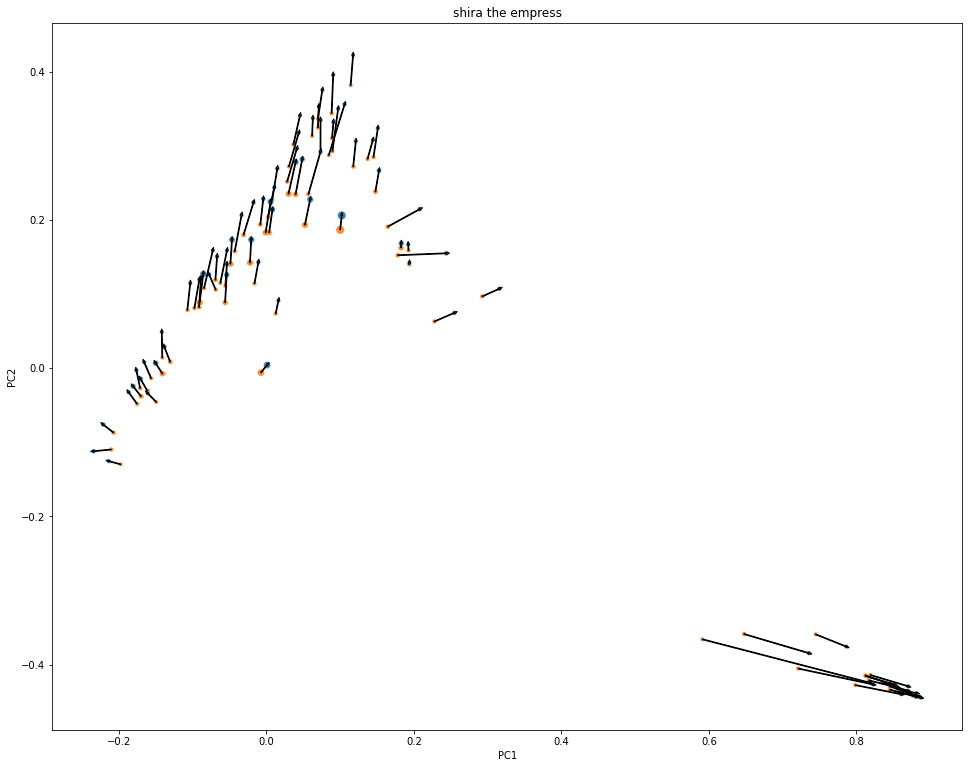

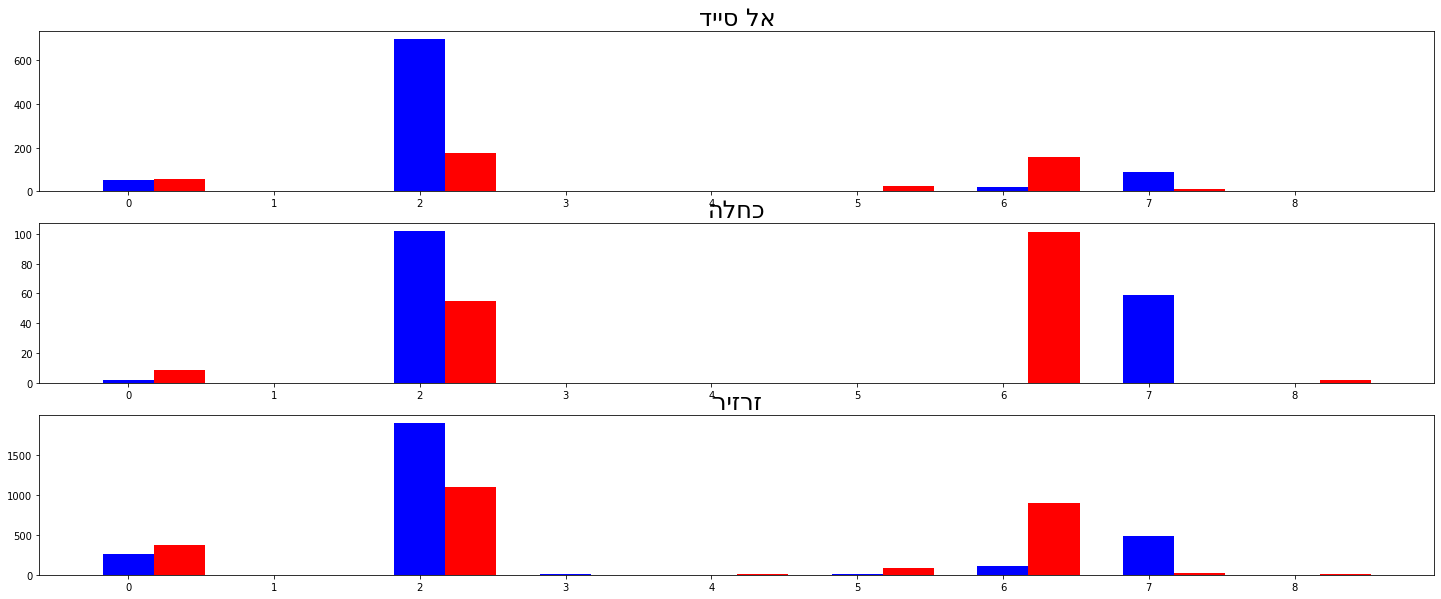

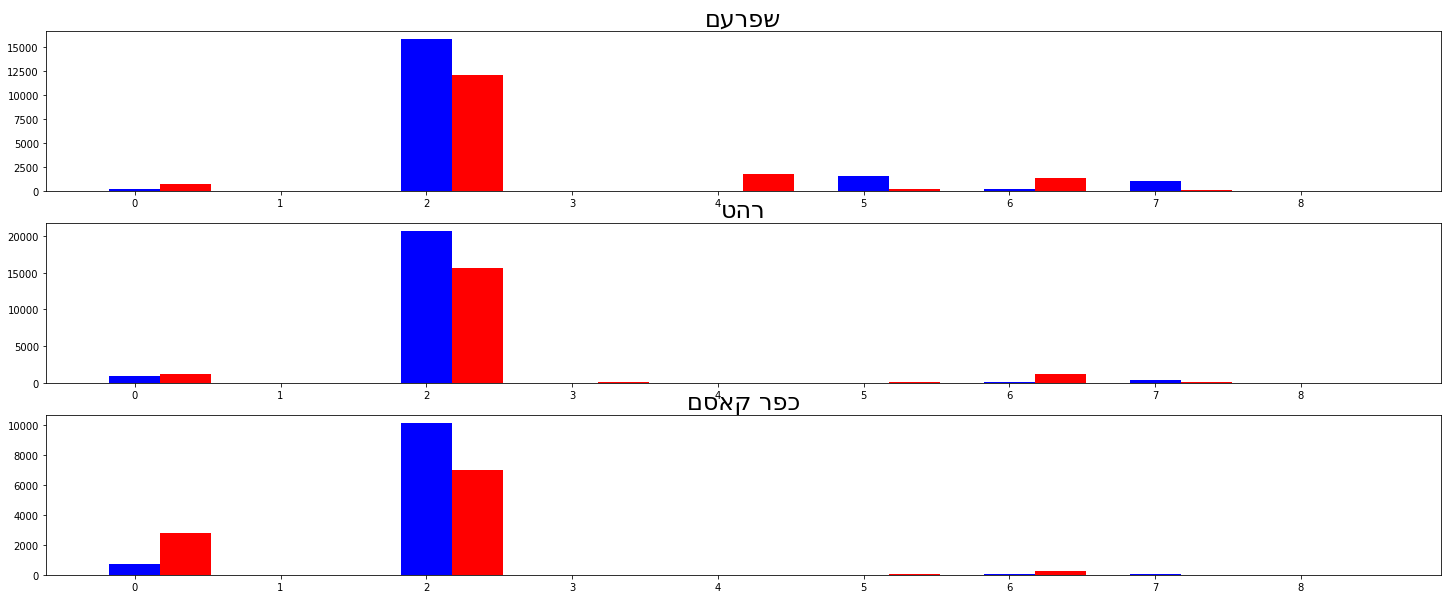

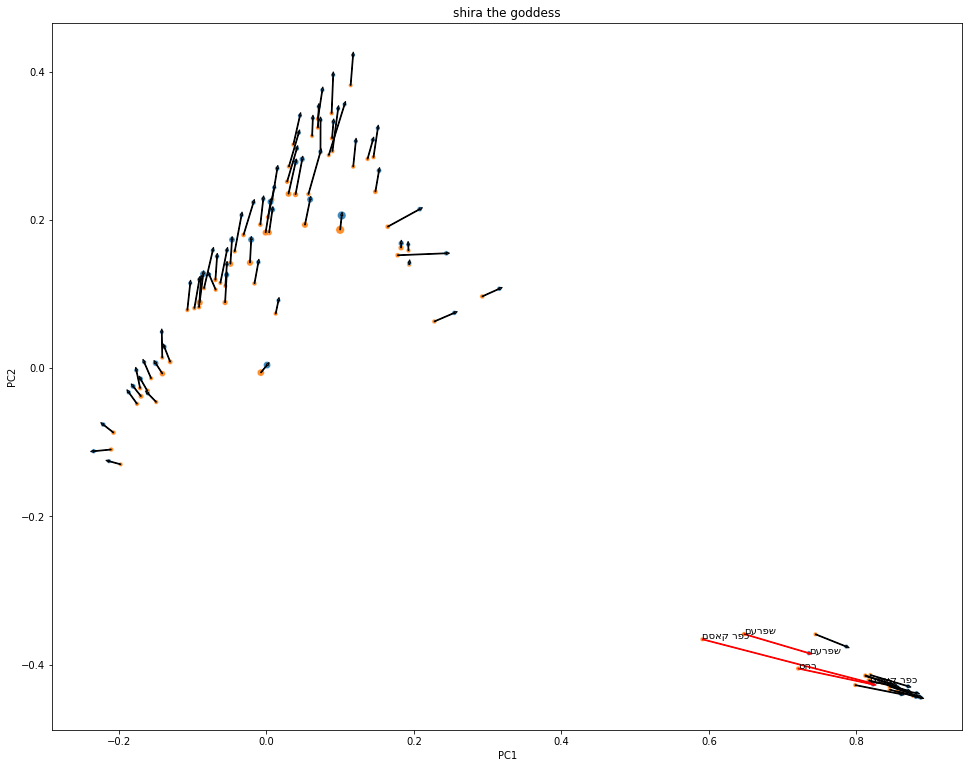

0
1
2
3
4
5
6
7
8
9


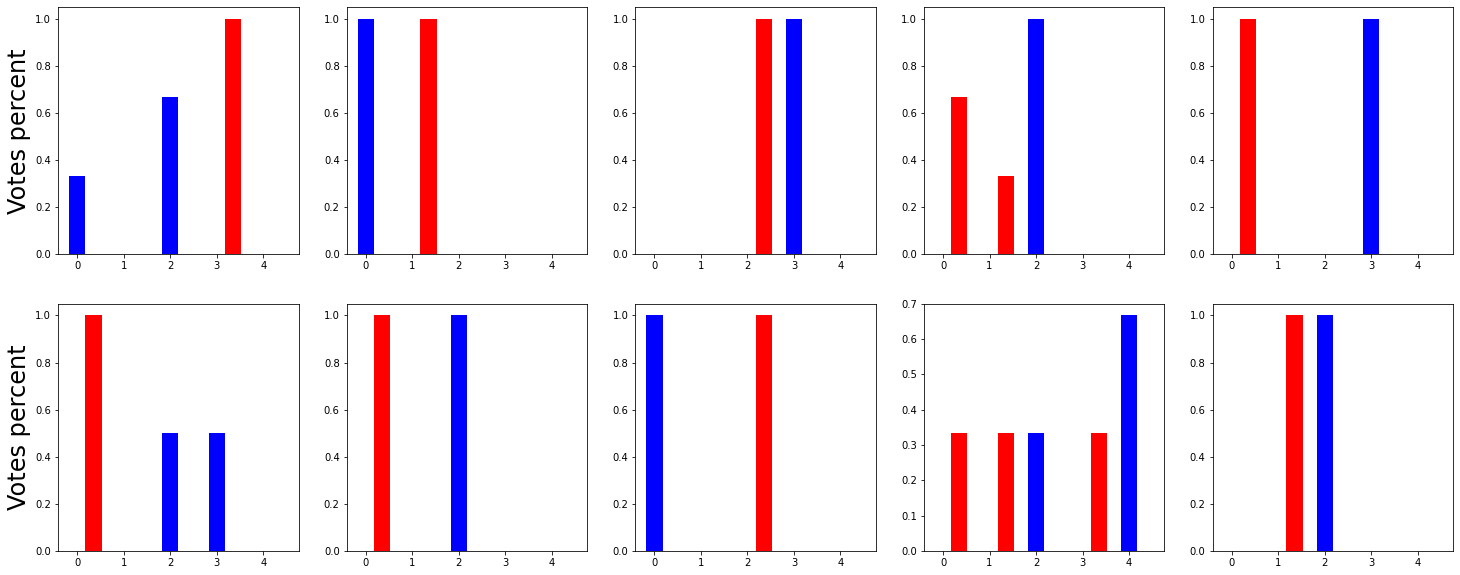

0
1
2
3
4
5
6
7
8
9


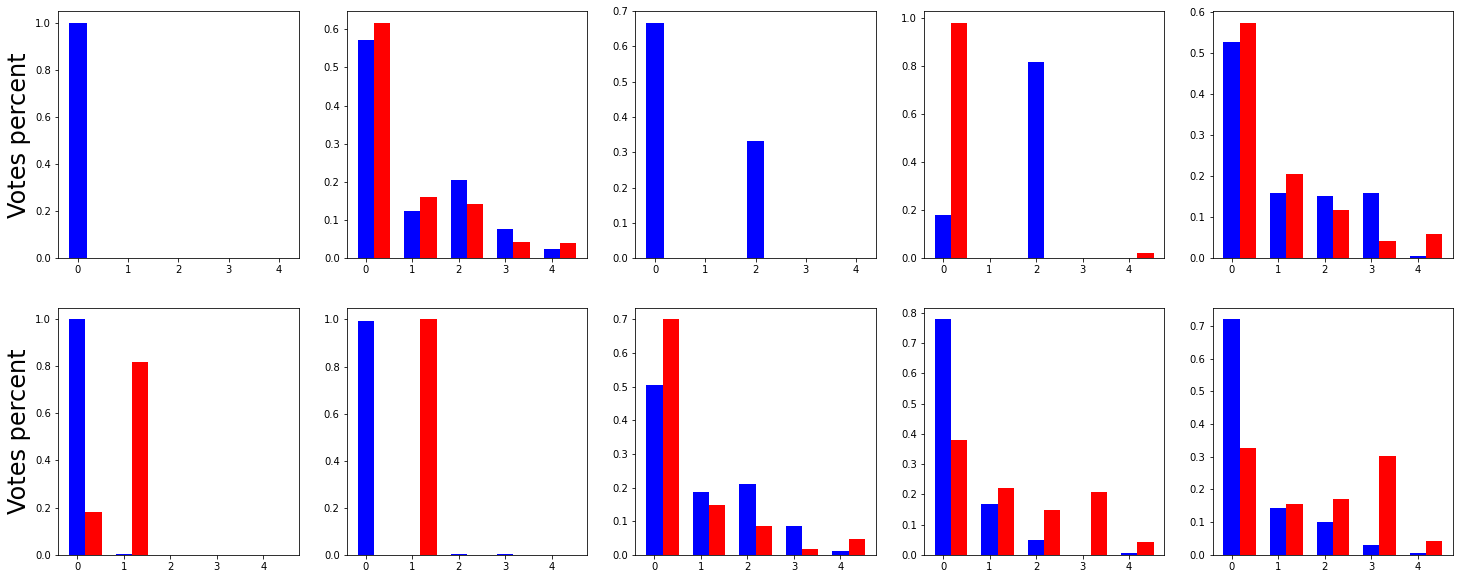

In [23]:


q1()
df_2020_ballot, df_2020_raw_ballot = read_election_results('2020', 'ballot')
df_2019b_ballot, df_2019b_raw_ballot = read_election_results('2019b', 'ballot')
b2020 = adapt_df(df_2020_raw_ballot, list(parties_dict_2020.keys()), include_no_vote=False,
                    ballot_number_field_name='קלפי')
b2019b = adapt_df(df_2019b_raw_ballot, list(parties_dict_2019b.keys()), include_no_vote=False,
                    ballot_number_field_name='קלפי')

b2019b['אמת'] = b2019b[['מרצ', 'אמת']].sum(axis=1)
b2019b['נץ'] = b2019b['כף']
b2019b = b2019b.drop(['מרצ', 'כף'], axis=1)

combined = pd.merge(b2020, b2019b, how='inner', left_index=True, right_index=True)
n2020 = b2020.loc[combined.index]
n2019b = b2019b.loc[combined.index]# these dataframes contain number of votes for the two elections only in shared ballots
cities_2020 = n2020['ישוב']
cities_2019b = n2019b['ישוב']
n2020 = n2020.drop('ישוב',axis=1)
n2019b = n2019b.drop('ישוב',axis=1)
distance = (n2020 - n2019b) * (n2020 - n2019b)
distance = distance.dropna()
distance = distance.sum(axis=1)
distance = distance.sort_values(ascending=False) # this is bet
n2020right = n2020[['מחל', 'טב', 'שס', 'ג', 'נץ']]
n2019bright = n2019b[['מחל', 'טב', 'שס', 'ג', 'נץ']]
n2020rightratios = n2020right / np.array(n2020right.sum(axis=1)).reshape(-1, 1)
n2019brightratios = n2019bright / np.array(n2019bright.sum(axis=1)).reshape(-1, 1)
ten_most_changed_kalpies = abs(n2020rightratios-n2019brightratios).sum(axis=1).sort_values(ascending=False)[:10]

indexes_of_ten = np.array((ten_most_changed_kalpies).index)
dist_2020 = n2020rightratios.loc[indexes_of_ten]
dist_2019b = n2019brightratios.loc[indexes_of_ten]

subplot_bars_2(dist_2020, dist_2019b)

indexes_of_ten = np.array((distance[:10]).index)
dist_2020 = n2020rightratios.loc[indexes_of_ten]
dist_2019b = n2019brightratios.loc[indexes_of_ten]

subplot_bars_2(dist_2020, dist_2019b)
